In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def sir_model(u, t):
    S, I, R = u
    dS = -beta*S*I
    dI = beta*S*I - gamma*I
    dR = gamma*I
    return np.array([dS, dI, dR])

In [3]:
def rk4(f, u0, t0, tf, n):
    t = np.linspace(t0, tf, n+1)
    u = np.array((n+1) * [u0])
    h = (tf - t0) / n

    for i in range(n):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return u, t

In [4]:
beta = 0.2
gamma = 0.1
s0 = 15000
I0 = 36
R0 = 0
u0 = np.array([s0, I0, R0])
t0 = 0
tf = 114
n = 100000

u, t = rk4(sir_model, u0, t0, tf, n)
S, I, R = u.T

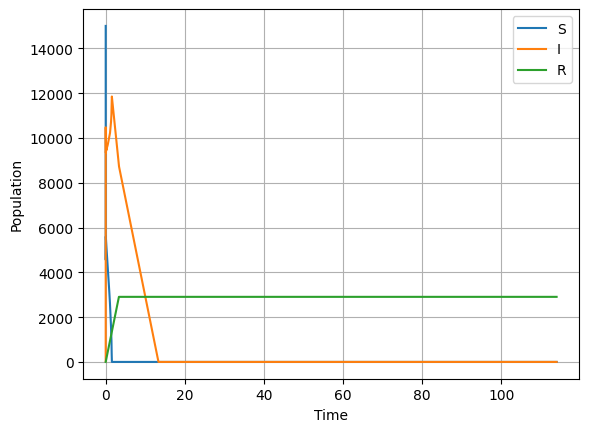

In [5]:
plt.plot(t, u[:, 0], label="S")
plt.plot(t, u[:, 1], label="I")
plt.plot(t, u[:, 2], label="R")
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend()
plt.grid()
plt.show()